In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from tqdm import tqdm 
np.random.seed(8)

# Define the fitness and network creation function
from fitness import CountingOnes
from networks import RandomBinaryNetwork, PlotNetwork
from ga import PlotStats

In [2]:
# Define a big function with arguments such as:
# nw_size, fitness_func, iterations, popsize, selection rates, crossover rates, mutation rates 
def main(
    network_size,
    pop_size, # must be even for crossover
    max_gen,
    crossover_rate,
    mutation_rate,
):

    # Define the results lists
    avg_fitness_history = []
    max_fitness_history = []
    min_fitness_history = []
    generation_history = []
    elite_history = []

    # Create the initial population as a list of np arrays
    pop = []
    for _ in range(pop_size):
        pop.append(RandomBinaryNetwork(network_size))

    # Loop
    for generation in tqdm(range(max_gen)):

        if generation > 0:
            # Recording fitness values max-min-avg, best solution history
            avg_fitness = np.mean(fitness)
            max_fitness = max(fitness)
            min_fitness = min(fitness)
            best = pop[fitness.index(max(fitness))]

            avg_fitness_history.append(avg_fitness) 
            max_fitness_history.append(max_fitness)
            min_fitness_history.append(min_fitness)
            generation_history.append(generation)
            elite_history.append(best)

        # Compute the fitness and store it in a vector
        fitness = []
        for i in range(pop_size):
            fitness.append(CountingOnes(pop[i]))

        # Fitness proportionate Selection
        selection_proba = fitness / sum(fitness)
        selection_cum_proba = np.cumsum(selection_proba)

        randoms = np.random.random(pop_size)
        next_pop = []
        next_index = []

        for j in range(pop_size):
            n = randoms[j]
            loc = 0
            while n > selection_cum_proba[loc]:
                loc += 1
            if loc > pop_size:
                print([n, loc, pop_size])
                print(selection_cum_proba)
                raise ValueError('Iteration through cumulative probabilities did not find a proper match.')
            next_pop.append(pop[loc])
            next_index.append(loc)

        # Crossover 
        points = np.random.randint(0, network_size-1,size=pop_size)
        probs = np.random.random(pop_size)
        k = 0
        while k < pop_size:
            networkA = next_pop[k]
            networkB = next_pop[k+1]
            crossover_point = points[k]

            networkC = np.copy(networkA)
            networkD = np.copy(networkB)

            if probs[k] <= crossover_rate:
                networkC[crossover_point+1:network_size,:] = networkB[crossover_point+1:network_size,:]
                networkD[0:crossover_point,:] = networkA[0:crossover_point,:]

                next_pop[k] = networkC
                next_pop[k+1] = networkD
            k += 2
        
        # Mutation

        ''' element wise mutation '''
        '''
        true_mutation_rate = mutation_rate / (network_size ** 2)
        for l in range(pop_size): # network
            for m in range(network_size): # row 
                probs = np.random.random(network_size)
                for n in range(network_size): # column
                    if probs[n] <= true_mutation_rate: #maybe not correct
                        if next_pop[l][m,n] == 0:
                            next_pop[l][m,n] = 1
                        if next_pop[l][m,n] == 1:
                            next_pop[l][m,n] = 0
        '''

        ''' hypermutation '''
        probs = np.random.random(pop_size)
        for l in range(pop_size):
            if probs[l] <= mutation_rate:
                pop[l] = RandomBinaryNetwork(network_size)

        # Elitism 
        next_pop[-1] = pop[fitness.index(max(fitness))]
        pop[:] = next_pop 
        del next_pop 


    return avg_fitness_history, max_fitness_history, min_fitness_history, generation_history, elite_history

100%|██████████| 20000/20000 [00:23<00:00, 835.77it/s]


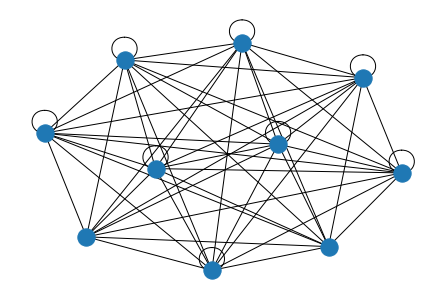

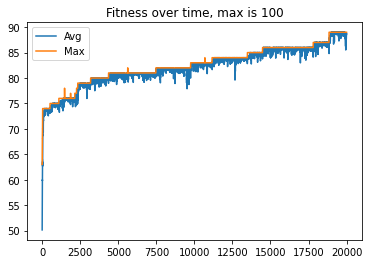

In [5]:
avg_fitness_history, max_fitness_history, min_fitness_history, generation_history, elite_history = main(
    10,
    100, # must be even for crossover
    20000,
    0.8,
    0.1,
)

# Produce nice graphs and show the best resulting network
PlotNetwork(elite_history[-1])
PlotStats(avg_fitness_history, max_fitness_history, min_fitness_history)

